# Community demo #1

## Imported libraries

In [16]:
import numpy as np
import resurfemg
import math
import matplotlib.pyplot as plt
import os
from TMSiSDK.file_readers import Poly5Reader

C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


To run the community notebooks will need TMSiSDK. We have made it possible to access our branch of their library. 

To do this :
        
        1. Go to this page (the ReSurfEMG releases page):
        
        https://github.com/ReSurfEMG/ReSurfEMG/releases
        
        2. Download resurfemg-0.0.3-py3-none-any.whl (this is the package
        installed by pip)
        4. Run pip install ./resurfemg-0.0.3-py3-none-any.whl ( match the path your put the .whl file in)
        5. Open the notebooks (you should have jupyter in your environment to do this)
        6. Try importing TMSiSDK and ReSurfemgas in the next cell


Here we are going to make synthetic EMGs, which can be used to demonstrate how our package works in other notebooks.

Text(0, 0.5, 'EMG (a.u.)')

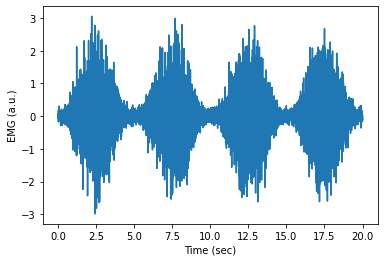

In [3]:
x = np.linspace(0, 20, 10000)
raised_sin = np.sin(x*6/60*2*math.pi)**2
synth_emg1 = raised_sin * np.random.randn((len(x)))+ 0.1 * np.random.randn(len(x))
#longt = 
plt.plot(x,synth_emg1 )#'.^2 .* randn(length(t),1) + 0.1 * randn(length(t), 1))
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')


OK, an alternate synthetic EMG

Text(0, 0.5, 'EMG (a.u.)')

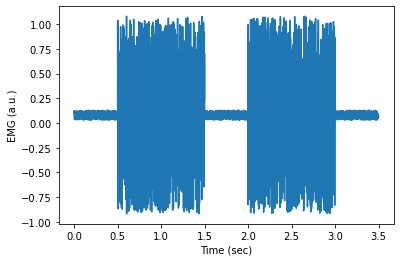

In [6]:
burst1 = np.random.uniform(-1, 1, size=1000) + 0.08
burst2 = np.random.uniform(-1, 1, size=1000) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08
synth_emg2 = np.concatenate([quiet, burst1, quiet, burst2, quiet]) 
time = np.array([i/1000 for i in range(0, len(synth_emg2), 1)])
fig = plt.figure()
plt.plot(time, synth_emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')


I like the first one...the sin function gives it that je ne c'est pa. Let's make a bunch of them.

In [7]:
how_many = input()

3


In [8]:
synthetic_emg_stack = []
for i in list(range(int(how_many))):
    x = np.linspace(0, 20, 10000)
    raised_sin = np.sin(x*6/60*2*math.pi)**2
    synther = raised_sin * np.random.randn((len(x)))+ 0.1 * np.random.randn(len(x))
    
    synthetic_emg_stack.append(synther)
synthetic_emg_stack    

[array([-0.11059816, -0.04728219,  0.07464202, ..., -0.0262236 ,
         0.02314546, -0.01715189]),
 array([ 0.04618102, -0.00865349, -0.10375816, ...,  0.02182747,
         0.01266349,  0.04394701]),
 array([ 0.05907461, -0.06166969, -0.01175743, ..., -0.00090333,
        -0.08702609,  0.12905044])]

OK, perhaps you don't want to use synthetic data. We can't show you real patient data for obvious reasons...but we can show you data collected from our machine on a very fake patient...you will even notice two leads picked up nothing. The patient is literally plastic here.

In [14]:
file_chosen = os.path.join(
    './',
    'Test_lung_data',
    '2022-05-13_11-51-04',
    '002',
    'EMG_recording.Poly5',
)

In [17]:
data_emg = Poly5Reader(file_chosen)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)

Reading file ./Test_lung_data\2022-05-13_11-51-04\002\EMG_recording.Poly5
	 Number of samples:  241904 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


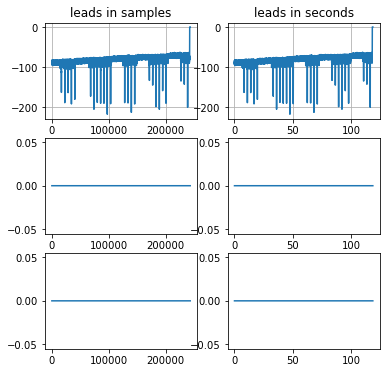

In [18]:
%matplotlib inline
# set up plot
x = data_samples
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x[0])
axis[0, 0].set(title='leads in samples')
axis[1, 0].plot(x[1])
axis[2, 0].plot(x[2])
axis[0, 1].set(title='leads in seconds')
axis[0, 1].grid(True)
axis[0, 1].plot(converted_to_seconds, x[0])
axis[1, 1].plot(converted_to_seconds, x[1])
axis[2, 1].plot(converted_to_seconds, x[2])